In [9]:
import pandas as pd


df = pd.read_csv(r'C:\Users\shrey\SHLOK Python Code\MACHINE_LEARNING\Project\student_performance.csv')

print('Sample Rows')

print(df.head())

print('Dataset Shape')

print(df.shape)

print(f'Rows : {df.shape[0] } || Columns : {df.shape[1]}')
print("Dataset Information")
print(df.info())

print('Summary Statistics')

print(df.describe(include='all'))

print("Missing Values in Each Column")
print(df.isnull().sum())


Sample Rows
   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  
Dataset Shape
(1000000, 6)
Rows : 1000000 || Columns : 6
Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               100

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r'C:\Users\shrey\SHLOK Python Code\MACHINE_LEARNING\Project\Students_success_dataset.csv')

print("Checkin Missing Values Before Encoding")

print(df.isnull().sum())


le = LabelEncoder()

df['test preparation course'] = le.fit_transform(df['test preparation course'])

df['gender'] = le.fit_transform(df['gender'])

print('\n After Encoding')

print(df.head())

print('datatypes after cleaning')

print(df.dtypes)

Checkin Missing Values Before Encoding
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 After Encoding
   gender race/ethnicity parental level of education         lunch  \
0       0        group B           bachelor's degree      standard   
1       0        group C                some college      standard   
2       0        group B             master's degree      standard   
3       1        group A          associate's degree  free/reduced   
4       1        group C                some college      standard   

   test preparation course  math score  reading score  writing score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1       

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        79
           1       0.67      0.89      0.77       121

    accuracy                           0.67       200
   macro avg       0.67      0.61      0.60       200
weighted avg       0.67      0.67      0.64       200



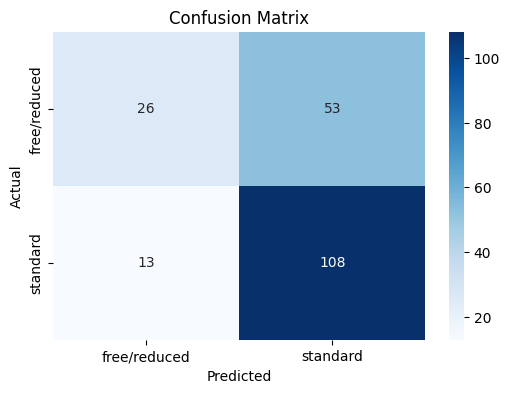


--------------------------Predict Your Result-----------------------
Test Preparation Course Prediction: standard


c:\Users\shrey\SHLOK Python Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv(r'C:\Users\shrey\SHLOK Python Code\MACHINE_LEARNING\Project\Students_success_dataset.csv')

# 2. Encoding
le = LabelEncoder()
# FIX: Ensure you are encoding the correct column for 'lunch'
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['lunch'] = le.fit_transform(df['lunch']) # Fixed: was df['gender'] in your snippet

# 3. Feature Selection
# ERROR FIX: You were using 'test preparation course' as both a FEATURE and the TARGET (y).
# Logistic regression cannot predict the target if it is already inside the X data.
features = ['math score', 'reading score', 'writing score', 'lunch']
target = 'test preparation course'

# 4. Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y = df[target]

# 5. Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Evaluation
y_pred = model.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_metrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_metrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Predict Your Result
print("\n--------------------------Predict Your Result-----------------------")

try:
    math_score = float(input("Enter Math Score: "))
    reading_score = float(input("Enter Reading Score: "))
    writing_score = float(input("Enter Writing Score: "))
    lunch_val = int(input("Enter Lunch (0 for standard, 1 for free/reduced): "))
    
    # ERROR FIX: The DataFrame columns must match the order and names used in training
    user_input_data = pd.DataFrame([[math_score, reading_score, writing_score, lunch_val]], 
                                    columns=features)

    # ERROR FIX: Scaler expects the same number of features (4) as used in fit()
    user_input_scaled = scaler.transform(user_input_data)
    user_prediction = model.predict(user_input_scaled)

    # Inverse transform to get the original label text
    prediction_text = le.inverse_transform(user_prediction)
    print(f'Test Preparation Course Prediction: {prediction_text[0]}')

except Exception as e:
    print(f"An error occurred: {e}")